<a href="https://colab.research.google.com/github/AmiBZ/DeepLearning/blob/main/DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Accès à la base de donnée MNIST

In [18]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [19]:
np.shape(X_train)
np.shape(y_train)
np.shape(X_test)

(10000, 28, 28)

**Visualisation**

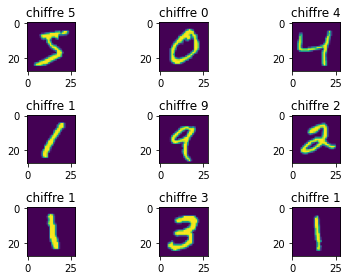

In [20]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout() #pour donner de l'éspace entre les figure
  plt.imshow(X_train[i])
  plt.title("chiffre {}".format(y_train[i]))

**Transformation des images ( Matrix 28*28) en des vecteurs(784)**

In [21]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

**Normalisation**

In [22]:
# Faut pas travailler sur des donner de type entier
#les transformer en des données de type float
#par la dévision ou bien par un transtipage: X_train = X_train.astype(dtype="float") 
X_train = X_train/255
X_test = X_test/255

**Transformation des labels**

In [ ]:
print(np.unique(y_train))

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

print(y_train[0], Y_train[0])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
  model=Sequential()
  model.add(Dense(512, input_shape=(784,),activation="relu"))
  model.add(Dense(512, activation = "relu"))
  model.add(Dense(10, activation="softmax"))

  return model

model = create_model()

**Compilation**

In [26]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])


**Appentissage**

In [ ]:
#Executer la compilation avant l'apprentissage
h=model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test,Y_test))

In [ ]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.subplot(2,1,2)
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()

In [29]:
prediction_test= model.predict_classes(X_test)

In [ ]:
fig_Pred = plt.figure()
X_test = X_test.reshape(10000,28,28)
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.tight_layout() 
  plt.imshow(X_test[i])
  plt.title("pred {}  truth {}".format(prediction_test[i],y_test[i]))